# load data

In [1232]:
from sklearn.datasets import load_wine
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

data = load_wine()
data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

# feature & target selection

In [1233]:
feature = pd.DataFrame(data['data'], columns = data['feature_names'])
target = pd.DataFrame(data['target'], columns = ['class'])

df = pd.concat([feature[['alcohol','malic_acid']], target], axis = 1)
df

,alcohol,malic_acid,class
0,14.23,1.71,0
1,13.20,1.78,0
2,13.16,2.36,0
3,14.37,1.95,0
4,13.24,2.59,0
...,...,...,...
173,13.71,5.65,2
174,13.40,3.91,2
175,13.27,4.28,2
176,13.17,2.59,2


# 決策區域圖繪製def

In [1241]:
def plot_decision_regions(x,y,classifier,test_idx=None,resolution=0.02):
    
    markers = ('s','x','o','^','v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = x[:,0].min() - 1, x[:,0].max() + 1
    x2_min, x2_max = x[:,1].min() - 1, x[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y==cl,0],
                   y=x[y==cl,1],
                   alpha=0.8,
                   c=colors[idx],
                   marker=markers[idx],
                   label=cl,
                   edgecolor='black')
        

    if test_idx:
        x_test, y_test = x[test_idx, :], y[test_idx]
        
        plt.scatter(x_test[:, 0],
                   x_test[:, 1],
                   c='',
                   edgecolor='black',
                   alpha=1.0,
                   linewidth=1,
                   marker='o',
                   s=100,
                   label='test set')

# train test split & StandardScaler

In [1242]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.iloc[:,:2].values
y = df.iloc[:,2].values

# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state= 50)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state= 50, stratify=y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [1243]:
X_std_all = np.vstack((X_train_std, X_test_std))
y_all = np.hstack((y_train, y_test))

# svm = SVC(kernel = 'linear')

In [1244]:
from sklearn.svm import SVC

svm = SVC(kernel = 'linear')
svm.fit(X_train_std,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [1245]:
pred_train = svm.predict(X_train_std)
pred = svm.predict(X_test_std)

In [1246]:
from sklearn.metrics import accuracy_score
print('trian:',accuracy_score(y_train,pred_train))
print('test:',accuracy_score(y_test,pred))

trian: 0.8028169014084507
test: 0.8055555555555556


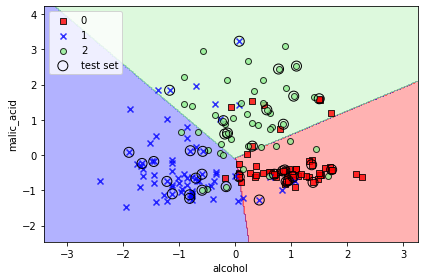

In [1248]:
plot_decision_regions(X_std_all, y_all, classifier=svm ,test_idx=range(142,178))
plt.xlabel('alcohol')
plt.ylabel('malic_acid')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# svm_rbf = SVC(kernel = 'rbf', gamma = )

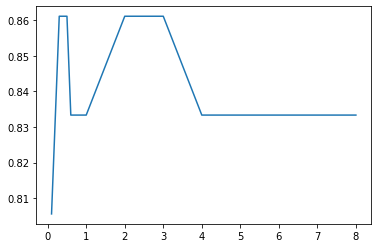

In [1205]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

candidate = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8]
scores = []

for i in candidate:
    
    svm_rbf = SVC(kernel = 'rbf', gamma = i)
    svm_rbf.fit(X_train_std,y_train)
    pred = svm_rbf.predict(X_test_std)
    scores.append(accuracy_score(y_test,pred))

plt.plot(candidate, scores)

In [1206]:
scores

[0.8055555555555556,
 0.8333333333333334,
 0.8611111111111112,
 0.8611111111111112,
 0.8611111111111112,
 0.8333333333333334,
 0.8333333333333334,
 0.8333333333333334,
 0.8333333333333334,
 0.8333333333333334,
 0.8611111111111112,
 0.8611111111111112,
 0.8333333333333334,
 0.8333333333333334,
 0.8333333333333334,
 0.8333333333333334,
 0.8333333333333334]

In [1249]:
svm_rbf = SVC(kernel = 'rbf', gamma = 0.3)
svm_rbf.fit(X_train_std,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.3, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [1250]:
pred_train = svm_rbf.predict(X_train_std)
pred = svm_rbf.predict(X_test_std)
print('trian:',accuracy_score(y_train,pred_train))
print('test:',accuracy_score(y_test,pred))

trian: 0.8450704225352113
test: 0.8611111111111112


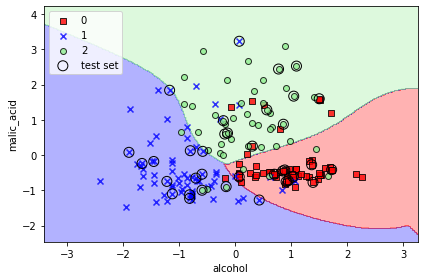

In [1251]:
plot_decision_regions(X_std_all, y_all, classifier=svm_rbf,test_idx=range(142,178))
plt.xlabel('alcohol')
plt.ylabel('malic_acid')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [1252]:
svm_rbf = SVC(kernel = 'rbf', gamma = 3)
svm_rbf.fit(X_train_std,y_train)
pred_train = svm_rbf.predict(X_train_std)
pred = svm_rbf.predict(X_test_std)
print('trian:',accuracy_score(y_train,pred_train))
print('test:',accuracy_score(y_test,pred))

trian: 0.8661971830985915
test: 0.8611111111111112


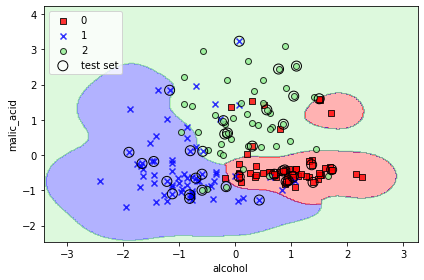

In [1253]:
plot_decision_regions(X_std_all, y_all, classifier=svm_rbf,test_idx=range(142,178))
plt.xlabel('alcohol')
plt.ylabel('malic_acid')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# svm_poly = SVC(kernel = 'poly', degree = )

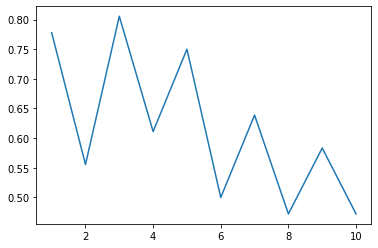

In [1212]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

candidate = [1,2,3,4,5,6,7,8,9,10]
scores = []

for i in candidate:
    
    svm_poly = SVC(kernel = 'poly', degree = i)
    svm_poly.fit(X_train_std,y_train)
    pred = svm_poly.predict(X_test_std)
    scores.append(accuracy_score(y_test,pred))

plt.plot(candidate, scores)

In [1213]:
scores

[0.7777777777777778,
 0.5555555555555556,
 0.8055555555555556,
 0.6111111111111112,
 0.75,
 0.5,
 0.6388888888888888,
 0.4722222222222222,
 0.5833333333333334,
 0.4722222222222222]

In [1254]:
svm_poly = SVC(kernel = 'poly', degree = 3)
svm_poly.fit(X_train_std,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [1255]:
pred_train = svm_poly.predict(X_train_std)
pred = svm_poly.predict(X_test_std)
print('trian:',accuracy_score(y_train,pred_train))
print('test:',accuracy_score(y_test,pred))

trian: 0.7464788732394366
test: 0.8055555555555556


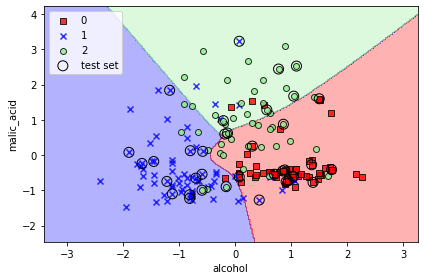

In [1256]:
plot_decision_regions(X_std_all, y_all, classifier=svm_poly,test_idx=range(142,178))
plt.xlabel('alcohol')
plt.ylabel('malic_acid')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()